In [2]:
pip install spotipy

  Using cached spotipy-2.16.1-py3-none-any.whl (24 kB)



In [100]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from secrets_spotify import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
redirect_uri="http://google.com/"
username='12170191826'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope="user-library-read"))

In [102]:
offset = 0

In [103]:
columns_data = ['id','name','artist','added_at']

columns_features = ['id','energy', 'liveness',
                    'tempo', 'speechiness',
                    'acousticness', 'instrumentalness',
                    'time_signature', 'danceability',
                    'key', 'duration_ms', 'loudness',
                    'valence', 'mode', 'type', 'uri']

In [104]:
results = sp.current_user_saved_tracks(limit=50, offset=0)

In [105]:
data = []
audio_features = []

In [106]:
for item in results['items']:

    id_track = item['track']['id'] 
    track_name = item['track']['name'] 
    track_artist = item['track']['artists'][0]['name']
    added_at = item['added_at'][:10]

    data.append([id_track, track_name, track_artist, added_at])

    ft = sp.audio_features(id_track)[0]

    audio_features.append([ft['id'],ft['energy'], ft['liveness'],
                ft['tempo'], ft['speechiness'],
                ft['acousticness'], ft['instrumentalness'],
                ft['time_signature'], ft['danceability'],
                ft['key'], ft['duration_ms'],
                ft['loudness'], ft['valence'],
                ft['mode'], ft['type'],
                ft['uri']])

In [107]:
df_track = pd.DataFrame(data, columns=columns_data)

In [108]:
df_ft_track = pd.DataFrame(audio_features, columns=columns_features)

In [109]:
dff = pd.merge(df_track, df_ft_track, on='id', how = 'inner')

In [110]:
dff.head()

,id,name,artist,added_at,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,4slx2fkIKddgijl3YZms9Y,Drowning,Scarlet City,2020-11-07,0.844,0.1120,121.966,0.1710,0.4220,0.000000,4,0.818,5,209512,-8.109,0.483,0,audio_features,spotify:track:4slx2fkIKddgijl3YZms9Y
1,39kdh6z0m3UNDfBqLLiXcz,Night 1,Ta-ku,2020-11-04,0.359,0.1120,152.185,0.0685,0.0127,0.628000,4,0.835,0,183187,-12.531,0.389,1,audio_features,spotify:track:39kdh6z0m3UNDfBqLLiXcz
2,2vuLi6xjzvK3idG8EwHVbJ,Companion,C4C,2020-11-01,0.225,0.1260,80.009,0.1470,0.6100,0.876000,4,0.863,7,150000,-11.586,0.325,1,audio_features,spotify:track:2vuLi6xjzvK3idG8EwHVbJ
3,2kmWfYjBR2dgAbB4ZBF9bT,Cold,NEFFEX,2020-10-28,0.643,0.0985,125.060,0.0877,0.0664,0.000001,4,0.786,8,186240,-8.851,0.702,1,audio_features,spotify:track:2kmWfYjBR2dgAbB4ZBF9bT
4,53o1Y5xDhfy5rFKpJoh7ZH,Lost,Lost Sky,2020-10-28,0.868,0.1100,149.996,0.0343,0.0338,0.504000,4,0.590,6,157192,-4.372,0.144,0,audio_features,spotify:track:53o1Y5xDhfy5rFKpJoh7ZH


In [111]:
print(f'Average song time is: {(dff.duration_ms.mean()/1000)/60} minutes')

Average song time is: 3.3505313333333335 minutes


In [112]:
dff.artist.value_counts()

Swif7                  3
Lost Sky               2
Europe                 2
Juice WRLD             2
NEFFEX                 2
Bazanji                1
Lil Skies              1
Wisin                  1
DJ DENZ The Rooster    1
Arizona Zervas         1
DaBaby                 1
Scarlet City           1
Machine Gun Kelly      1
Ta-ku                  1
Basixx                 1
Ted Nugent             1
88rising               1
Manowar                1
24kGoldn               1
YNW Melly              1
KILLY                  1
Tom Day                1
StaySolidRocky         1
blackbear              1
Iamjakehill            1
The Seige              1
C4C                    1
Tesla                  1
Philanthrope           1
LIZOT                  1
Ht Bristol             1
Cory Marks             1
Heuse                  1
iann dior              1
Blue Öyster Cult       1
Barren Gates           1
Egzod                  1
Bad Religion           1
Ozuna                  1
Travis Scott           1


In [113]:
tps = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

In [114]:
corr = dff[tps].corr()

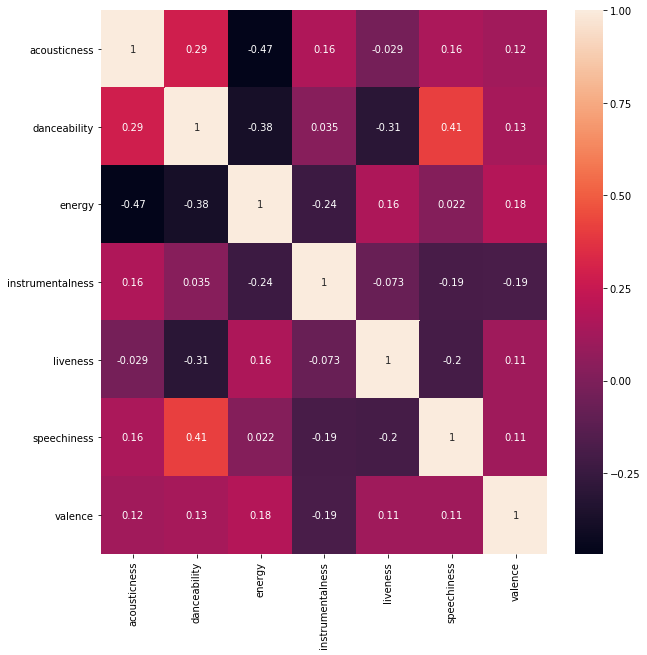

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [116]:
matheus_features = dff.loc[:,tps]  
matheus_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.4220,0.818,0.844,0.000000,0.1120,0.1710,0.483
1,0.0127,0.835,0.359,0.628000,0.1120,0.0685,0.389
2,0.6100,0.863,0.225,0.876000,0.1260,0.1470,0.325
3,0.0664,0.786,0.643,0.000001,0.0985,0.0877,0.702
4,0.0338,0.590,0.868,0.504000,0.1100,0.0343,0.144


In [117]:
matheus_features.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.164825,0.629600,0.721820,0.131831,0.142994,0.086244,0.411858
std,0.200358,0.142856,0.191402,0.284952,0.089718,0.071974,0.217568
min,0.000040,0.245000,0.225000,0.000000,0.072300,0.028400,0.053300
25%,0.024850,0.537750,0.629500,0.000000,0.098850,0.037400,0.244750
50%,0.086050,0.664500,0.783500,0.000009,0.112000,0.053450,0.391000
75%,0.228500,0.734000,0.867500,0.001339,0.145250,0.102925,0.604250
max,0.811000,0.863000,0.959000,0.938000,0.605000,0.351000,0.857000


In [118]:
n = len(matheus_features.mean())
sc = matheus_features.columns

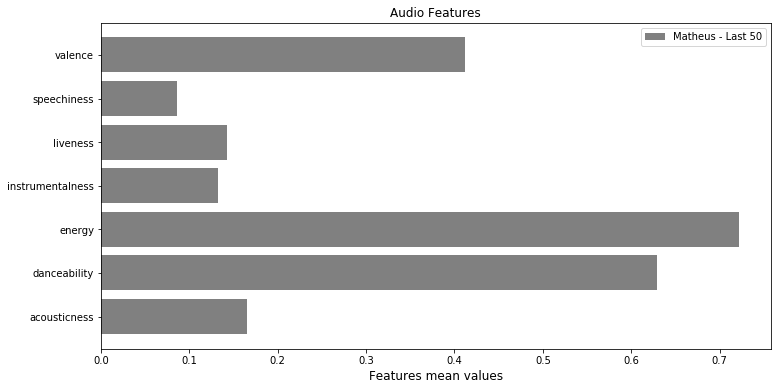

In [119]:
plt.figure(figsize=(12,6))
plt.barh(sc, matheus_features.mean(), label='Matheus - Last 50', color='gray')
plt.xlabel('Features mean values',fontsize=12)
plt.legend(loc='best')
plt.title('Audio Features')

plt.show()